In [3]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 56.3 MB/s eta 0:00:00
Mounted at /content/gdrive


In [4]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [5]:
path = untar_data(URLs.MNIST_SAMPLE) #download the MNIST sample dataset from a predefined URL provided by FastAI, and store the path to the extracted data in the variable path

In [5]:
#hide
Path.BASE_PATH = path

In [6]:
path.ls() #return a list of all files and subdirectories in the directory specified by path

(#3) [Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/train')]

In [7]:
(path/'train').ls() #list the contents of the train directory within the path

(#2) [Path('/root/.fastai/data/mnist_sample/train/3'),Path('/root/.fastai/data/mnist_sample/train/7')]

In [8]:
#  list and sort the contents of the directory 'train' containing images of the digits '3' and '7'
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [9]:
im3_path = threes[1]
im3 = Image.open(im3_path) #use the Image class from the Python Imaging Library (PIL, which is now part of the Pillow library) to open the image file specified by im3_path
im3 #display the image

In [10]:
#convert the PIL image object im3 into a NumPy array and then extract a specific portion of this array
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [11]:
#convert the PIL image object im3 into a PyTorch tensor and then extract a specific portion of this tensor
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [12]:
#hide_output
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22]) #slice the tensor to extract rows 4 to 14 and columns 4 to 21, creating a smaller 2D tensor, then convert it to a Pandas DF
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys') #apply a background gradient based on the values in the DataFrame, using the 'Greys' colormap

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


<img width="453" id="output_pd_pixels" src="images/att_00058.png">

In [13]:
# load images of the digits '3' and '7' from their respective directories into lists of PyTorch tensors
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors) #print the number of tensors loaded for each digit

(6131, 6265)

We'll also check that one of the images looks okay. Since we now have tensors (which Jupyter by default will print as values), rather than PIL images (which Jupyter by default will display as images), we need to use fastai's `show_image` function to display it:

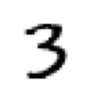

In [14]:
show_image(three_tensors[1]); #display the second image of the digit '3'

In [15]:
#stack the tensors representing images of the digit '7' and the digit '3' into single tensors, and then normalize the pixel values to be in the range [0, 1] by dividing by 255
#the value 255 represents the maximum pixel value in an 8-bit grayscale image

stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

#print the shape of the tensor containing images of the digit '3'
stacked_threes.shape

torch.Size([6131, 28, 28])

In [16]:
len(stacked_threes.shape) #return the number of dimensions in the shape of the tensor stacked_threes

3

In [18]:
stacked_threes.ndim #get a tensor's rank directly with ndim

3

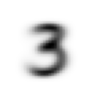

In [24]:
mean3 = stacked_threes.mean(0) #calculate the mean across the first dimension (index 0) of the tensor stacked_threes
show_image(mean3); #vizualize the average appearance of the digit '3' across all images in the dataset

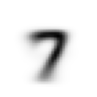

In [25]:
mean7 = stacked_sevens.mean(0) #calculate the mean across the first dimension (index 0) of the tensor stacked_sevens
show_image(mean7); #vizualize the average appearance of the digit '7' across all images in the dataset

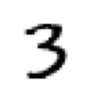

In [26]:
a_3 = stacked_threes[1] #get a sample of digit 3
show_image(a_3);

In [27]:
# compute two different distance metrics between an random image of the digit '3' (a_3) and the mean image of the digit '3' (mean3)
dist_3_abs = (a_3 - mean3).abs().mean() #Compute mean absolute difference

dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt() #Compute root mean squared difference

dist_3_abs,dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [28]:
## compute two different distance metrics between an random image of the digit '3' (a_3) and the mean image of the digit '7' (mean7)
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In both cases, the distance between our 3 and the "ideal" 3 is less than the distance to the ideal 7. So our simple model will give the right prediction in this case.

In [ ]:
#compute two different loss functions between an individual image of the digit '3' (a_3) and the mean image of the digit '7' (mean7)
#The two loss functions used are the mean absolute error (L1 loss) and the mean squared error (MSE loss)
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [29]:
#create a list data containing two lists, each representing a row of data. Then, convert this data into both a NumPy array and a PyTorch tensor.
data = [[1,2,3],[4,5,6]]
arr = array (data)
tns = tensor(data)

In [30]:
arr  # numpy

array([[1, 2, 3],
       [4, 5, 6]])

In [31]:
tns  # pytorch

tensor([[1, 2, 3],
        [4, 5, 6]])

In [32]:
tns[1] #display 2nd row of the tensor

tensor([4, 5, 6])

In [33]:
tns[:,1] #display data from the 2nd column

tensor([2, 5])

In [34]:
tns[1,1:3]

tensor([5, 6])

And you can use the standard operators such as `+`, `-`, `*`, `/`:

In [35]:
tns+1

tensor([[2, 3, 4],
        [5, 6, 7]])

Tensors have a type:

In [36]:
tns.type()

'torch.LongTensor'

And will automatically change type as needed, for example from `int` to `float`:

In [37]:
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

## Computing Metrics Using Broadcasting

In [41]:
#load images of the digits '3' and '7' from their respective directories in the validation set, then convert them into PyTorch tensors
#normalize the pixel values to be in the range [0, 1] by dividing by 255
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

#print the shapes of the tensors
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [42]:
#define a function to calculate the mean absolute difference between two images represented as tensors
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))

mnist_distance(a_3, mean3)

tensor(0.1114)

In [44]:
#calculate the mean absolute difference between each image in the tensor valid_3_tens and the mean image mean3
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1745, 0.1173, 0.1285,  ..., 0.1229, 0.1605, 0.1107]),
 torch.Size([1010]))

In [45]:
tensor([1,2,3]) + tensor(1)

tensor([2, 3, 4])

In [46]:
(valid_3_tens-mean3).shape #the shape of the resulting tensor will be the same as the shape of valid_3_tens.

torch.Size([1010, 28, 28])

In [47]:
#define a function to take an image represented as a tensor x, return True if the distance between x and the mean image of digit '3' (mean3) is less than the distance between x and the mean image of digit '7' (mean7)

def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

Let's test it on our example case:

In [48]:
is_3(a_3), is_3(a_3).float() #convert the boolean result of is_3(a_3) into a float value (1.0 for True and 0.0 for False)

(tensor(True), tensor(1.))

In [50]:
accuracy_3s =      is_3(valid_3_tens).float() .mean() #calculate the mean of the float values, giving the accuracy of classifying images of the digit '3' as '3'

accuracy_7s = (1 - is_3(valid_7_tens).float()).mean() #calculate the mean of the negated float values, giving the accuracy of classifying images of the digit '7' as '7'


accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2 #Calculate the average accuracy between classifying images of the digit '3' and '7'


(tensor(0.9168), tensor(0.9854), tensor(0.9511))

## Stochastic Gradient Descent (SGD)

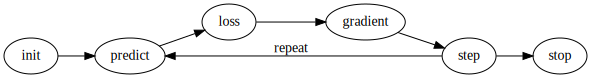

In [51]:
#id gradient_descent
#caption The gradient descent process
#alt Graph showing the steps for Gradient Descent
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

Before applying these steps to our image classification problem, let's illustrate what they look like in a simpler case. First we will define a very simple function, the quadratic—let's pretend that this is our loss function, and `x` is a weight parameter of the function:

In [52]:
def f(x): return x**2 #define a quadratic function

Here is a graph of that function:

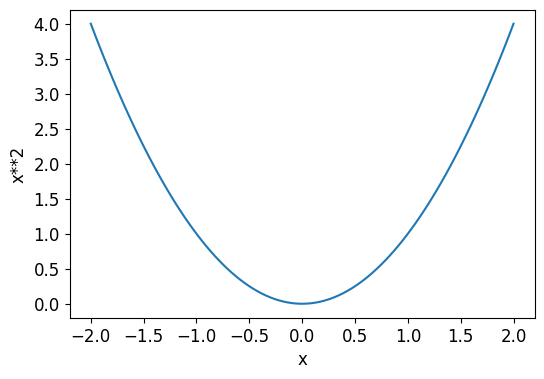

In [53]:
plot_function(f, 'x', 'x**2') #plot the loss function

The sequence of steps we described earlier starts by picking some random value for a parameter, and calculating the value of the loss:

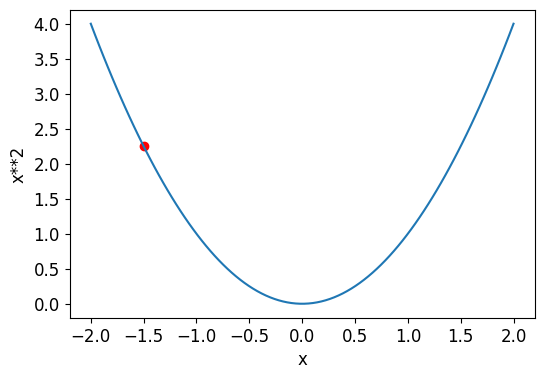

In [55]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red'); #pick a random value for the 'x' parameter

### Calculating Gradients

In [56]:
xt = tensor(3.).requires_grad_() #create a PyTorch tensor 'xt' with a single element containing the value 3.0 and enables gradient tracking for this tensor

In [57]:
yt = f(xt) #compute yt by applying function f(x)
yt

tensor(9., grad_fn=<PowBackward0>)

In [61]:
xt.grad

tensor(6.)

In [79]:
xt = tensor([3.,4.,10.]).requires_grad_() #create a PyTorch tensor xt with three elements [3.0, 4.0, 10.0] and enable gradient tracking for this tensor
xt

tensor([ 3.,  4., 10.], requires_grad=True)

And we'll add `sum` to our function so it can take a vector (i.e., a rank-1 tensor), and return a scalar (i.e., a rank-0 tensor):

In [63]:
def f(x): return (x**2).sum()

yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

Our gradients are `2*xt`, as we'd expect!

In [64]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

### Stepping With a Learning Rate

Now let's apply all of this in an end-to-end example.

### An End-to-End SGD Example

In [82]:
time = torch.arange(0,20).float(); time #create a PyTorch tensor 'time' containing floating-point values from 0 to 19

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

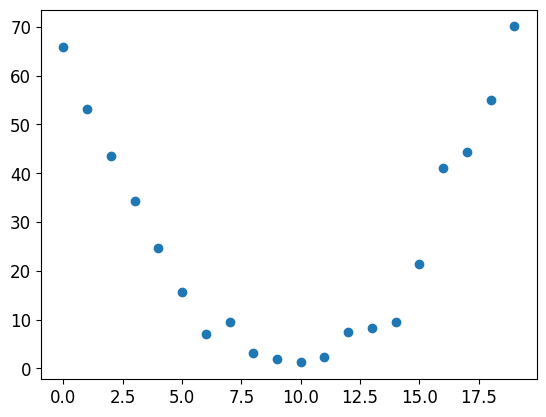

In [83]:
#generate a synthetic dataset for time and speed and then create a scatter plot to visualize the relationship between them

speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [84]:
#this function takes two inputs: a time value t and a set of parameters params consisting of three values [a, b, c]
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c #return a computed value based on a quadratic function

In [85]:
def mse(preds, targets): return ((preds-targets)**2).mean() #define a loss function

Now, let's work through our 7 step process.

#### Step 1: Initialize the parameters

In [86]:
params = torch.randn(3).requires_grad_() #initialize the parameters to random values and ask PyTorch to track their gradients

In [87]:
#hide
orig_params = params.clone()

#### Step 2: Calculate the predictions

In [88]:
preds = f(time, params) #calculate the predictions with input 'time' and random parameters

Let's create a little function to see how close our predictions are to our targets, and take a look:

In [89]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

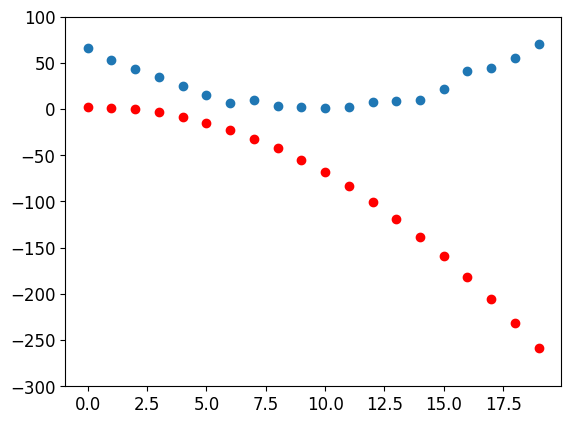

In [90]:
show_preds(preds) #plot predicted values vs actuals

#### Step 3: Calculate the loss

In [92]:
loss = mse(preds, speed) #calculate the loss
loss

tensor(20858.0801, grad_fn=<MeanBackward0>)

#### Step 4: Calculate the gradients

In [93]:
loss.backward() #calculate the gradients
params.grad

tensor([-47743.6523,  -3047.7839,   -224.2141])

In [94]:
params.grad * 1e-5 #pick a learning rate of 1e-5

tensor([-0.4774, -0.0305, -0.0022])

In [95]:
params

tensor([-0.7409,  0.3618,  1.9199], requires_grad=True)

#### Step 5: Step the weights.

In [96]:
#update the parameters based on the gradients we just calculated
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [97]:
preds = f(time,params)
mse(preds, speed)

tensor(4435.8994, grad_fn=<MeanBackward0>)

And take a look at the plot:

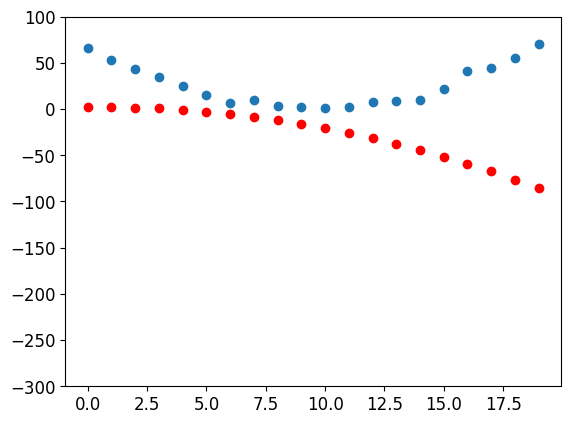

In [99]:
show_preds(preds) #show the plot after updating the parameters

We need to repeat this a few times, so we'll create a function to apply one step:

In [100]:
#create a function to iterate the process above
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

#### Step 6: Repeat the process

In [102]:
for i in range(10): apply_step(params) #loop and perform improvements

602.9793701171875
602.9744873046875
602.9697265625
602.965087890625
602.9603271484375
602.9556884765625
602.9508666992188
602.9461669921875
602.94140625
602.9368286132812


In [103]:
#hide
params = orig_params.detach().requires_grad_()

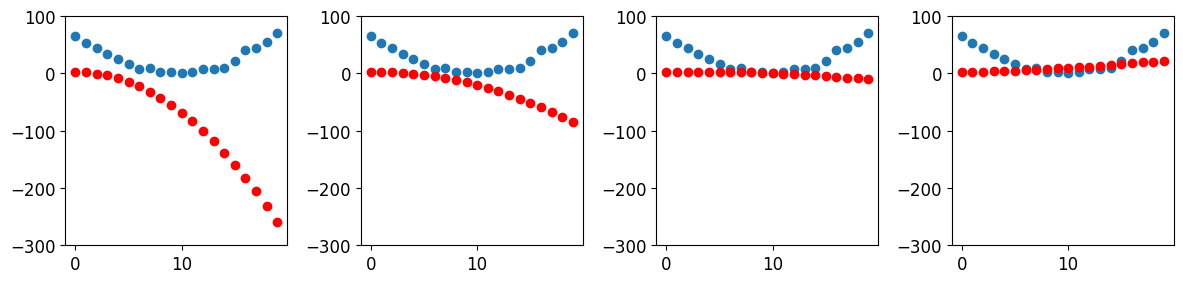

In [104]:
#plot the results of improving
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

#### Step 7: stop

### Summarizing Gradient Descent

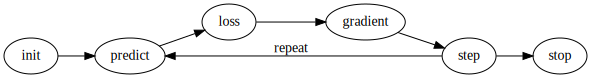

In [105]:
#hide_input
#id gradient_descent
#caption The gradient descent process
#alt Graph showing the steps for Gradient Descent
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

## The MNIST Loss Function

In [107]:
# concatenate two tensors stacked_threes and stacked_sevens along the first dimension (rows), and then reshape the resulting tensor into a 2D tensor
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [108]:
#label for each image, use `1` for 3s and `0` for 7s
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [109]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

In [110]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [111]:
# the *initialize* step in our seven-step process
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [113]:
weights = init_params((28*28,1))

In [112]:
bias = init_params(1)

In neural networks, the `w` in the equation `y=w*x+b` is called the *weights*, and the `b` is called the *bias*. Together, the weights and bias make up the *parameters*.

> jargon: Parameters: The _weights_ and _biases_ of a model. The weights are the `w` in the equation `w*x+b`, and the biases are the `b` in that equation.

In [ ]:
(train_x[0]*weights.T).sum() + bias #calculate a prediction for one image

tensor([20.2336], grad_fn=<AddBackward0>)

In [114]:
# compute the predictions of a linear regression model given the input data xb, using the initialized weights weights and a bias term bias
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[ 3.7602],
        [10.0223],
        [15.1395],
        ...,
        [ 4.7646],
        [ 1.8502],
        [ 3.3399]], grad_fn=<AddBackward0>)

In [118]:
corrects = (preds>0.5).float() == train_y #compare the predictions to a threshold value of 0.5, convert the result to floating-point numbers, and then check if the predicted values match the actual labels train_y
#compute a tensor of boolean values indicating whether each prediction was correct or not

corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

In [119]:
corrects.float().mean().item() #calculate the mean accuracy of the predictions stored in the tensor corrects



0.4831397235393524

In [116]:
with torch.no_grad(): weights[0] *= 1.0001

In [120]:
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.4820910096168518

In [121]:
trgts  = tensor([1,0,1])
prds   = tensor([0.9, 0.4, 0.2])

Here's a first try at a loss function that measures the distance between `predictions` and `targets`:

In [122]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

Let's try it on our `prds` and `trgts`:

In [123]:
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [124]:
mnist_loss(prds,trgts)

tensor(0.4333)

In [125]:
mnist_loss(tensor([0.9, 0.4, 0.8]),trgts)

tensor(0.2333)